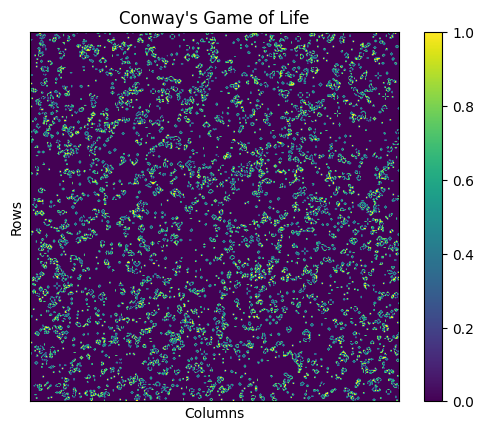

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import convolve

def update_grid(grid):
  """
  This function updates the grid based on Conway's Game of Life rules.

  Args:
      grid (numpy.ndarray): A 2D array representing the current state of the grid, 
                             where 0 represents dead cells and 1 represents alive cells.

  Returns:
      numpy.ndarray: A 2D array representing the updated state of the grid 
                     after applying Conway's rules.
  """

  # Compute the number of neighbors for each cell using convolution
  # This calculates the sum of surrounding cells (including itself) with a kernel size of 3x3.
  # The 'constant' mode ensures edge cells have neighbors by filling 
  # the missing edges with zeros (cval=0). 
  neighbors = convolve(grid, np.ones((3, 3)), mode='constant', cval=0) - grid

  # Apply Conway's rules:
  #   - Any live cell with 2 or 3 live neighbors survives.
  #   - Any dead cell with exactly 3 live neighbors becomes a live cell.
  #   - All other live cells die in loneliness or overcrowding.
  new_grid = np.zeros_like(grid)
  new_grid[(grid == 1) & ((neighbors == 2) | (neighbors == 3))] = 1  # Surviving live cells
  new_grid[(grid == 0) & (neighbors == 3)] = 1  # Newborns from dead cells

  return new_grid

# Initialize the grid with random values (0: dead, 1: alive)
grid = np.random.choice([0, 1], size=(500, 500))

def update_plot(frame):
  """
  This function updates the plot with the new grid state for each generation.

  Args:
      frame (int): The current frame number of the animation (not used directly).

  Returns:
      tuple: A tuple containing the updated image object and itself 
             (following the expected return format for FuncAnimation).
  """

  global grid  # Access the global grid variable within the function
  grid = update_grid(grid)  # Update the grid using the update_grid function
  img.set_array(grid)  # Update the image data with the new grid
  return img,

# Create a figure and axis
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])

# Display the initial grid with custom colors (using 'viridis' colormap for better visualization)
img = ax.imshow(grid, cmap='viridis')

# Customize the appearance of the plot
plt.title("Conway's Game of Life")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar(img, ax=ax)  # Add a colorbar to explain the color mapping

# Create an animation with 100 frames and an interval of 50 milliseconds between frames
ani = animation.FuncAnimation(fig, update_plot, frames=100, interval=50)

# Save the animation as a GIF file with a frame rate of 10 frames per second
ani.save('conways_game_of_life.gif', writer='pillow', fps=10)

plt.show()
